## Problem Statement: To classify iris flower according to the species.

### These are the steps required for any data science task or project.

### Data Gathering:
##### a. API
##### b. Web Scraping
##### c. Secondary or primary data from different sources like kaggle, github, etc.

#### Data Cleaning:
##### a. Handle missing values: Impute or remove missing data.
##### b. Remove duplicate records.
##### c. Detect and treat outliers.
##### d. Correct inconsistent data.

#### Data Transformation:
##### a. Feature scaling: Normalize or standardize numerical features.
##### b. Feature encoding: Convert categorical variables into numerical representations.
##### c. Feature engineering: Create new features or transform existing ones.
##### d. Dimensionality reduction: Reduce the number of features.

#### Data Integration:
##### a. Combine data from multiple sources.
##### b. Ensure consistency and compatibility between datasets.

#### Data Reduction:
##### a. Reduce dataset size if necessary.
##### b. Apply sampling techniques if needed.

#### Data Normalization:
##### a. Normalize data for improved efficiency and accuracy.

#### Data Splitting:
##### a. Split the dataset into training, validation, and test sets.

#### Data Visualization:
##### a. Explore data visually to gain insights.

#### Documentation:
##### a. Keep track of preprocessing steps.
##### b. Document assumptions and decisions made.

In [1]:
#Importing the libraries needed to load the dataset
import pandas as pd

In [2]:
#Loading the dataset
df = pd.read_csv('./Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
#Now comes data preprocessing
#So checking the data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
#Checking the data description
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
#Checking the missing values
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

#### As there are no missing values, so we can move forward to duplicate values.

In [6]:
#Checking duplicates
df.duplicated().sum()

0

#### As there are no duplicates, so we can move forward to outlier detection and transformation.

<Axes: >

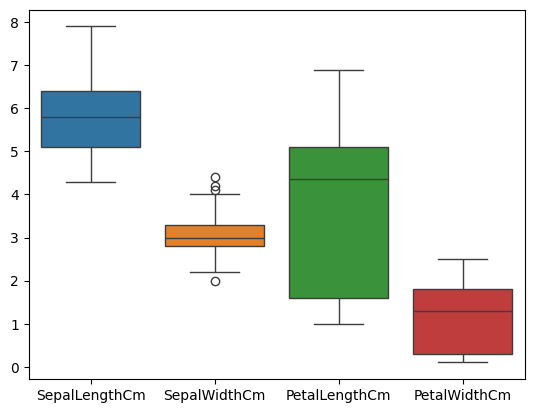

In [8]:
#Importing the libraries required for the outlier detection.
import seaborn as sns
sns.boxplot(df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']])

#### As there are outliers, so we can move forward to outlier transformation as clustering are sensitive to outliers.

<Axes: xlabel='SepalWidthCm', ylabel='Density'>

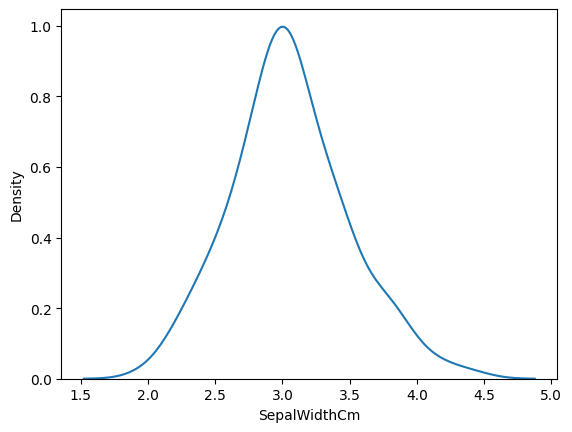

In [9]:
#Checking the distribution of outliered data
sns.kdeplot(df['SepalWidthCm'])

In [10]:
#Performing winsorization to handle outlier
from scipy.stats import mstats
limits = (0.05, 0.05)  # Winsorization limits
df['SepalWidthCm'] = mstats.winsorize(df['SepalWidthCm'], limits=limits)

<Axes: ylabel='SepalWidthCm'>

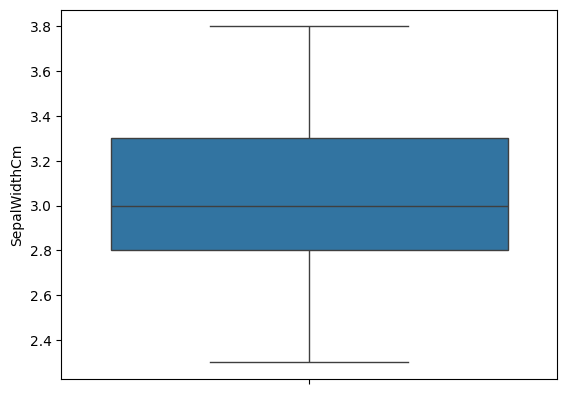

In [11]:
#Checking the oultier using visualization
sns.boxplot(df['SepalWidthCm'])

#### As outliers are removed from the data, the data is now completely preprocessed.

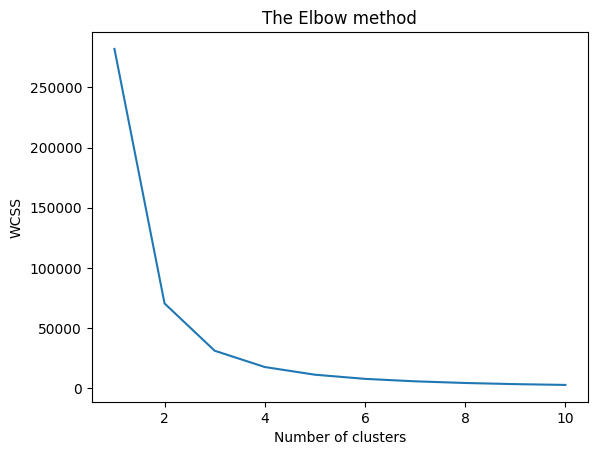

In [12]:
# Finding the k clusters for k-means classification 
x = df.iloc[:, [0, 1, 2, 3]].values

#importing kmeans package for clustering 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The e
plt.plot(range(1, 11), wcss)
plt.title('The Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

In [13]:
#creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

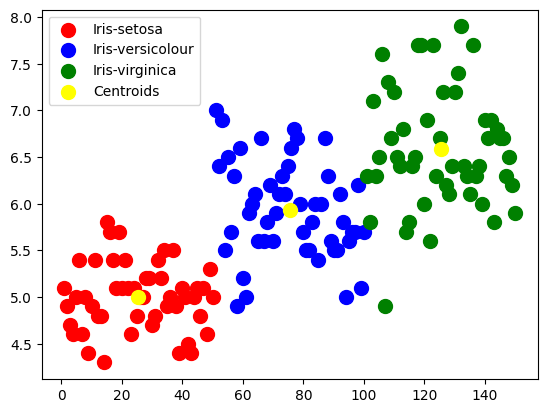

In [14]:

# visualizing the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')
plt.legend()

#### Here we classified the clusters as the iris species according to the features of the flower.